In [76]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
import seaborn as sns

device_df = pd.read_csv('Data/fp_device.csv', index_col=0)
activity_df = pd.read_csv('Data/fp_activity.csv', index_col=0)

In [77]:
device_df.shape

(2007, 5)

In [83]:
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['Electrolyte', 'Co-adsorbent', 'Co-sensitizer', 'Semiconductor', 'Molecule keywords']),
    remainder='passthrough'
)


transformed = transformer.fit_transform(device_df)

device_fp_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out(), index=device_df.index)

In [84]:
device_fp_df.to_csv('Data/device_oneHot_mk.csv')
device_fp_df

,onehotencoder__Electrolyte_0.005 M isopropanol solution of H2PtCl6·6H2O,onehotencoder__Electrolyte_Bromide_Tribromide,onehotencoder__Electrolyte_Co(II)_Co(III),"onehotencoder__Electrolyte_DHS-Z23, Heptachroma","onehotencoder__Electrolyte_EL-HSE, Dyesol",onehotencoder__Electrolyte_Iodide_Triiodide,onehotencoder__Electrolyte_Spiro-OMeTAD,onehotencoder__Electrolyte_Z-50 (Solaronix),onehotencoder__Electrolyte_not specified,onehotencoder__Electrolyte_solid organic ionic conductors,...,"onehotencoder__Molecule keywords_triphenylamine, coumarin","onehotencoder__Molecule keywords_triphenylamine, indole","onehotencoder__Molecule keywords_triphenylamine, phenothiazine","onehotencoder__Molecule keywords_triphenylamine,bodipy","onehotencoder__Molecule keywords_triphenylamine,carbazole","onehotencoder__Molecule keywords_triphenylamine,indole","onehotencoder__Molecule keywords_triphenylamine,phenothiazine","onehotencoder__Molecule keywords_triphenylamine,truxene",onehotencoder__Molecule keywords_truxene,"onehotencoder__Molecule keywords_truxene,triphenylamine"
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4422,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4423,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4424,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(device_fp_df.drop(['remainder__Molecule keywords'], axis=1), activity_df['PCE'], test_size=0.2)

reg = RandomForestRegressor()
reg.fit(X_train, Y_train)

pred_train_PCE = reg.predict(X_train)
pred_test_PCE = reg.predict(X_test)

r2 = r2_score(Y_train, pred_train_PCE)
q2 = r2_score(Y_test, pred_test_PCE)

print(f'R2: {r2}, Q2: {q2}')

train_results_dict = {'True': Y_train, 'Predicted': pred_train_PCE}
test_results_dict = {'True': Y_test, 'Predicted': pred_test_PCE}

train_results_df = pd.DataFrame.from_dict(train_results_dict)
test_results_df = pd.DataFrame.from_dict(test_results_dict)

R2: 0.21010405794664033, Q2: 0.18310410907508445


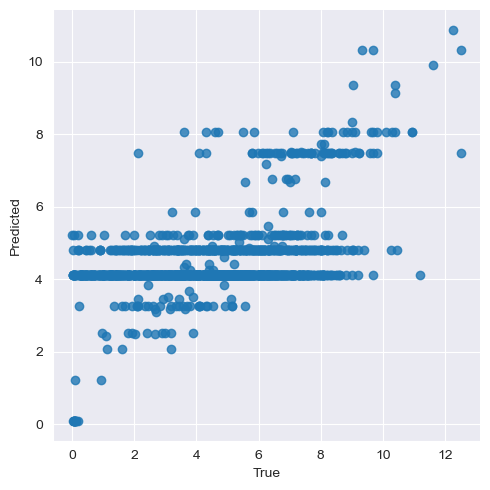

In [81]:
sns.lmplot(train_results_df, x='True', y='Predicted', legend=False, fit_reg=False)

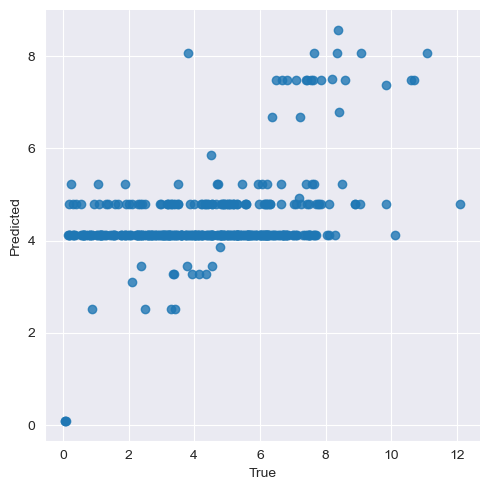

In [82]:
sns.lmplot(test_results_df, x='True', y='Predicted', legend=False, fit_reg=False)